<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

>[Deep Learning](#folderId=1rSFM3wiUYE8HqAzh2FRQBzm16CgYqV9F&updateTitle=true&scrollTo=TIdZT6uXjBSu)

>>[Neural Networks](#folderId=1rSFM3wiUYE8HqAzh2FRQBzm16CgYqV9F&updateTitle=true&scrollTo=KTbgah9-jGBc)

>>>[Neural Networks (Feedforward)](#folderId=1rSFM3wiUYE8HqAzh2FRQBzm16CgYqV9F&updateTitle=true&scrollTo=SA-Ib5T69vck)

>>>[Nonlinearities](#folderId=1rSFM3wiUYE8HqAzh2FRQBzm16CgYqV9F&updateTitle=true&scrollTo=wA2oh48n-Xn9)



## Neural Networks

- One or more hidden layers
- Every node in one layers i connected to every node in the next layer
- signals get transmitted from the input, to the hidden layers, to the output.
- the output is aiming for a target


Nueral networks are networks of neurons.
Logisitic unit is a neuron, **A neural network is just layers of logistic regression units.**

NN are trained using backpropagation. The error gets "propagated" backwards. The weights get updated based on this propagated error.




### Neural Networks (Feedforward)

W(i,j) goes from x(i) to z(j)

$$
z_j = \sigma(\sum_i(W_{ij}x_i)+b_j) \\
p(y|x) = \sigma(\sum_j(v_jz_j)+c)
$$

(v is output of the hidden nodes (z)

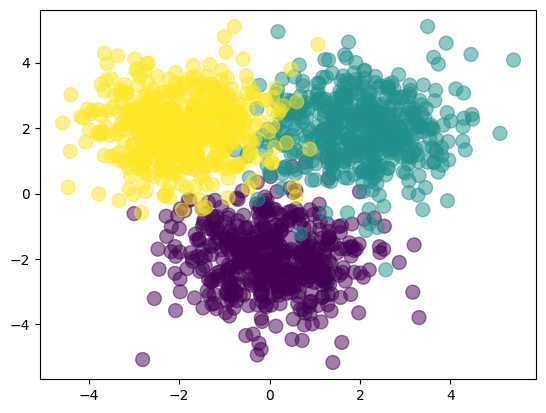

In [31]:
# Feedforward
import numpy as np
import matplotlib.pyplot as plt

Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [32]:
# randomly initialize weights
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [33]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [34]:
def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1) # sigmoid
    # Z = np.tanh(X.dot(W1) + b1) # tanh
    # Z = np.maximum(X.dot(W1) + b1, 0) # relu
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

In [35]:
# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [36]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

# verify we chose the correct axis
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights:", classification_rate(Y, P))

Classification rate for randomly chosen weights: 0.3453333333333333


### Nonlinearities

- Sigmoid
$$
\sigma = \frac{1}{1+e^{-x}}
$$

- Tanh

$$
\tanh = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- ReLu

$$
\text{relu} = \max(0,x)
$$

- Softmax

$$
\sigma(\vec{z})_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{K} e^{z_{j}}}
$$

In [6]:
# Softmax

import numpy as np
logit = np.random.randn(100, 5)

expo = np.exp(logit)

answer = expo / expo.sum(axis=1, keepdims=True)

answer[:5]

array([[0.04098939, 0.17594422, 0.48404909, 0.05277874, 0.24623857],
       [0.08555078, 0.12978908, 0.08533468, 0.33947689, 0.35984857],
       [0.01356773, 0.19048594, 0.10127627, 0.14100551, 0.55366456],
       [0.08754871, 0.26824994, 0.29453824, 0.10183476, 0.24782834],
       [0.29266622, 0.07995101, 0.13389914, 0.17429559, 0.31918804]])

In [7]:
answer.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])